# **Laboratorio 1:** Puesta en Producción de Modelos TensorFlow

En este laboratorio nos enfocaremos en modelar arquitecturas de Deep Learning para su despliegue final. Primero revisaremos la herramienta [Tensorflow](https://www.tensorflow.org/), la cual es una librería de código abierto para desarrollar pipelines de adquisición y procesamiento de datos, implementar modelos predictivos, y desplegar modelos para inferencia. Este framework fue lanzado en el 2015 por Google Brain; sin embargo, el 2019, Google lanzo TensorFlow 2.0 con funcionalidades actualizadas, un ecosistema mas compatible, y una mejor API de Keras.

La estructura de datos principal en TensorFlow es el *tensor*. Puedes pensar en este como una estructura de datos similar al array de Numpy, por lo que TensorFlow en muchos sentidos comparte características y funcionalidades con Numpy. Una de las principales ventajas de Tensorflow es que los modelos desarrollados con este framework tienen posibilidad de acloplarse a infinidad de lenguajes de programación, dispositivos móviles y dispositivos embebidos, lo cual hace a este framework una excelente opción en cuanto se requiere portabilidad para la puesta en producción.

<center><img src='https://media.giphy.com/media/QyJTDR8VkUtyKHNPm9/giphy.gif' width='30%'></center>

## 1. Tensores en TensorFlow

Los cálculos dentro de redes neuronales son principalmente un conjunto de operaciones de álgebra lineal usando *tensores*, como una generalización de las operaciones con matrices. Puedes entender a un vector como un *tensor* unidimensional, una matriz como un *tensor* bidimensional, y una matriz con elementos de tres índices como un tensor tridimensional. Un tensor puede guardar información de cualquier archivo o conjunto de datos que haya sido convertido a valores numéricos. Por ejemplo, un tensor podría contener valores numéricos de los precios de casas, una imagen, o todas las palabras de un libro.

La principal diferencia entre los tensores de TensorFlow y los arrays de NumPy es que los tensores tienen acceso a las GPUs ([Graphical Processing Units](https://en.wikipedia.org/wiki/Graphics_processing_unit)) y TPUs ([Tensor Processing Units](https://en.wikipedia.org/wiki/Tensor_Processing_Unit)). El beneficio de ejecutar operaciones con tensores en la GPU/TPU es la rapidez de los calculos, lo que significa que, si quisiéramos encontrar patrones en las representaciones numéricas de nuestros datos, las podremos encontrar en la mitad (o menos) del tiempo requerido usando CPUs ([Central Processing Units](https://en.wikipedia.org/wiki/Central_processing_unit)). Aunque tanto las GPUs como las TPUs son caras y poco accesibles, Colab nos permite acceder a hardware con GPUs y TPUs de forma libre y con muchas opciones para entrenar modelos.

Con los conceptos básicos cubiertos, es hora de explorar cómo podemos usar TF para trabajar con tensores. Primero iniciaremos importando TensorFlow.

In [ ]:
# Importar Tensorflow y mostrar su versión
import tensorflow as tf

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.15.0


Seis de las formas mas frecuentes para crear tensores se realizan con las funciones `tf.constant()`, `tf.Variable()`, `tf.fill()`, `tf.ones()`, `tf.zeros()` y `tf.random`. Las dos primeras permiten crear tensores con dimensión y valores variables; sin embargo, ambas se diferencian en que `tf.constant()` no permite modificar el tensor después de la creación, mientras que `tf.variable()` si. Entonces, podemos considerar a `tf.constant()` como las variables constantes presentes en la mayoría de lenguajes de programación.

Por otro lado `tf.fill()`, `tf.ones()` y `tf.zeros()` permiten crear tensores con un valor predeterminado para todos los elementos del tensor. Finalmente, `tf.random` permite crear tensores con valores aleatorios. En las siguientes celdas exploraremos estos metodos.

In [ ]:
# Crear un escalar (Tensor en la dimensión 0). Un tensor puede tener muchas
# dimensiones y la dimensión 0 sera para crear un número escalar independiente.
scalar = tf.constant(12)
# Mostrar tensor
print(scalar)
# Comprobar el número de dimensiones de un tensor (ndim significa número de dimensiones)
print("N. dimensiones: ", scalar.ndim)

tf.Tensor(12, shape=(), dtype=int32)
N. dimensiones:  0


In [ ]:
# Crear un vector (Tensor de 1 dimensión)
vector = tf.constant([12, 12])
print(vector)
print("N. dimensiones: ", vector.ndim)

tf.Tensor([12 12], shape=(2,), dtype=int32)
N. dimensiones:  1


In [ ]:
# Crear una matriz (Tensor de 2 dimensiónes)
matrix = tf.constant([[4.6, 2.7],
                      [7.9, 10.1]])
print(matrix)
print("N. dimensiones: ", matrix.ndim)

tf.Tensor(
[[ 4.6  2.7]
 [ 7.9 10.1]], shape=(2, 2), dtype=float32)
N. dimensiones:  2


Como puedes notar, TF crea tensores con un tipo de datos `int32` o `float32`. Esto se conoce como precisión de 32 bits, lo que significa que TF hara uso de 32 valores binarios para guardar cada elemento del tensor. Cuanto mayor sea el número de bits, más preciso será el número a guardarse en memoria. Además, mientras mayor sea el número de bits, más espacio requerirá un tensor para guardarse en memoria. A continuación, reduciremos la precisión a 16 bits por elemento.

In [ ]:
# Crear otra matriz y definir el tipo de datos
another_matrix = tf.constant([[5.3, 7.5],
                              [3.1, 2.],
                              [8.54, 2.4]], dtype=tf.float16) # Especificar el tipo de dato con 'dtype'
print(another_matrix)
# Similar a Numpy, la propiedad dtype permite ver el tipo de dato de cada elemento en el tensor
print("Tipo de dato:", another_matrix.dtype)

tf.Tensor(
[[5.3  7.5 ]
 [3.1  2.  ]
 [8.54 2.4 ]], shape=(3, 2), dtype=float16)
Tipo de dato: <dtype: 'float16'>


In [ ]:
# ¡Finalmente, crearemos un tensor de 3 dimensiones!
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
print(tensor)
print("N. dimensiones: ", tensor.ndim)

# Aprovecharemos este tensor para imprimir mas atributos del tensor
# Primero, recuperaremos la forma del tensor
print("Forma del tensor:", tensor.shape)
# Recuperaremos el número de elementos en el tensor. Para esto usaremos la función
# tf.size(); sin embargo, esta función devuelve un tensor con la dimensión 0
# por lo que sera necesario convertirlo a un array de Numpy para ver directamente su valor
print("Número de elementos en el tensor:", tf.size(tensor).numpy()) # .numpy() convierte cualquier tensor en un array de NumPy

tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]], shape=(3, 2, 3), dtype=int32)
N. dimensiones:  3
Forma del tensor: (3, 2, 3)
Número de elementos en el tensor: 18


La diferencia entre `tf.variable()` y `tf.constant()` es que los tensores creados con `tf.constant()` son inmutables (no se pueden cambiar después de su definición), mientras que los tensores creados con `tf.variable()` son mutables (se pueden cambiar). Los ejemplos, planteados arriba son aplicables también a los tensores creados con `tf.variable()`. Desde este punto, nos concentraremos en los tensores variables.

In [ ]:
# Veamos la estructura creada para ambos tipos de tensor con los mismos datos
variable_tensor = tf.Variable([10, 7])
constant_tensor = tf.constant([10, 7])
variable_tensor, constant_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Cambiar el valor de un tensor
variable_tensor[0].assign(7)
variable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

La anterior operación generaría errores si la ejecutaramos con `constant_tensor`. Para definir que tipo de tensor usar, sera importante identificar si el tensor sera modificado en algún punto del programa, en ese caso siempre se sugiere usar `tf.Variable()`. Por otra parte, la siguiente celda muestra una manera para iterar en tensores de TF.

In [ ]:
for i in tensor:
  for j in i:
    for k in j:
      print("Iterate tensor:",k)
  print("\n")

Iterate tensor: tf.Tensor(1, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(2, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(3, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(4, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(5, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(6, shape=(), dtype=int32)


Iterate tensor: tf.Tensor(7, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(8, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(9, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(10, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(11, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(12, shape=(), dtype=int32)


Iterate tensor: tf.Tensor(13, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(14, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(15, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(16, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(17, shape=(), dtype=int32)
Iterate tensor: tf.Tensor(18, shape=(), dtype=int32)




Continuemos viendo ejemplos para tensores con valores iguales para todos los elementos.  

In [ ]:
# Crear un tensor con todos valores iguales a uno
ones_tensor = tf.ones(shape=(3, 2))
ones_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Crear un tensor con todos valores iguales a cero
zeros_tensor = tf.zeros(shape=(2, 3))
zeros_tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
# Crear un tensor con todos valores iguales a un valor definido
value_tensor = tf.fill((3, 3), 7)
value_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]], dtype=int32)>

Finalmente, podemos crear tensores con valores aleatorios, lo cual es bastante útil cuando queremos simular un subconjunto de datos. Por ejemplo, imaginemos que tenemos un conjunto de imágenes en un tensor con el shape (32, 224, 224, 3), donde:

* 32 es el tamaño del batch (la cantidad de imágenes que ve una red neuronal en un momento dado).
* 224, 224 son el alto y el ancho de las imágenes en píxeles.
* 3 es el número de canales de color de la imagen (rojo, verde, azul).

Podemos simular este caso usando la clase `tf.random.Generator`.

In [ ]:
# Crear un tensor aleatorio con la distribución de probabilidades uniforme
# También podríamos usar la función random_batch.normal() en el caso de requerir una distribución normal
random_batch = tf.random.Generator.from_seed(42) # Establecer la semilla para la reproducibilidad
batch = random_batch.uniform(minval=0, maxval=255, shape=(32, 224, 224, 3),  dtype=tf.int32) # Crear tensor con una distribución uniforme
batch

<tf.Tensor: shape=(32, 224, 224, 3), dtype=int32, numpy=
array([[[[243,  42, 111],
         [ 48,  81,  66],
         [181, 207, 217],
         ...,
         [ 31, 141, 144],
         [ 80, 161,  96],
         [  4, 130, 124]],

        [[ 61, 139,  86],
         [120,  30, 245],
         [107, 176, 156],
         ...,
         [ 20, 241,  13],
         [161, 215,  26],
         [147,  61,  88]],

        [[ 28,  32,  98],
         [ 41, 207,  56],
         [203, 236, 168],
         ...,
         [ 83,  75, 112],
         [237, 251, 227],
         [224, 119, 108]],

        ...,

        [[215,  11, 182],
         [120,  91, 171],
         [  6,  93,  80],
         ...,
         [143,   7, 243],
         [ 28, 202, 193],
         [ 60, 214,  97]],

        [[ 59, 211,  40],
         [254,  56,  57],
         [149, 214,  24],
         ...,
         [  2,  83, 169],
         [231,  80, 115],
         [ 86,  96, 194]],

        [[151,   5, 208],
         [ 20, 156, 229],
         [137, 19

Para concluir esta sección, veremos que también podemos crear tensores desde arrays de Numpy. Estas son dos maneras principales para hacer esto: 1) pasando un array de Numpy a la función `tf.constant()` o `tf.Variable()`, y 2) convirtiendo un array de Numpy con la función `tf.convert_to_tensor(array_numpy)`.

In [ ]:
import numpy as np

# Crear una matriz NumPy entre 1 y 25
numpy_A = np.arange(1, 25, dtype=np.int32)

A = tf.constant(numpy_A,
                shape=[2, 4, 3]) # nota: el número total de elementos de la forma (2*4*3) tiene que coincidir con el número de elementos en la matriz numpy_A
print("Array Numpy")
print(numpy_A)
print(type(numpy_A))
print("\n")
print("Tensor TF")
print(A)
print(type(A))

Array Numpy
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
<class 'numpy.ndarray'>


Tensor TF
tf.Tensor(
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]
  [19 20 21]
  [22 23 24]]], shape=(2, 4, 3), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


Finalmente, podemos hacer que el tensor vuelva a ser un array de numpy con la función `numpy()`, disponible desde cualquier tensor de TensorFlow.

In [ ]:
print("Retorno a Array Numpy")
back_numpy = A.numpy()

print(back_numpy)
print(type(back_numpy))

Retorno a Array Numpy
[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]
  [19 20 21]
  [22 23 24]]]
<class 'numpy.ndarray'>


En general, uno no crea tensores por si mismo sino que programa a TF para crearlos. Esto debido a que TF tiene módulos integrados (como `tf.io` y `tf.data`) que pueden leer datasets y convertirlos automáticamente en tensores, para que después los modelos de redes neuronales los procesen por nosotros. Sin embargo, es muy importante entender como trabajar con ellos y comprender como funcionan, para cuando surja un error y uno requiera debuggear el problema.

## 2. Operaciones con Tensores

### 2.1 Operaciones básicas
Las operaciones básicas como la suma, resta, multiplicación y división entre un tensor y un valor escalar son aplicables directamente con los signos respectivos. Por ejemplo:  

In [ ]:
# Agregar valores a un tensor usando el operador de suma
tensor = tf.Variable([[10, 7], [3, 4]])
tensor = tensor + 10
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

TF también tiene funciones para realizar las mismas operaciones de manera optimizada: `tf.multiply()`, `tf.add()`, `tf.substract()`, `tf.divide()`. Se sugiere priorizar el uso de estas funciones cada vez que se pueda. Estas funciones tienen la ventaja de ejecutarse de manera optimizada cuando se esta trabajando con modelos y acceso a GPU.

In [ ]:
# Usar la función equivalente al operador '*' (multiplicar)
tensor = tf.multiply(tensor, 20)
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[400, 340],
       [260, 280]], dtype=int32)>

### 2.2 Multiplicación de Matrices

Una de las operaciones más comunes en los algoritmos de aprendizaje automático es la multiplicación de matrices. TensorFlow implementa esta operación con el método `tf.matmul()`. Las dos reglas principales para realizar la multiplicación de matrices (simbolizada por @) son:

1. Las dimensiones internas de las matrices deben coincidir.
  - (3, 5) @ (3, 5) no funcionara
  - (5, 3) @ (3, 5) funciona
  - (3, 5) @ (5, 3) funciona
2. La matriz resultante tiene la forma de las dimensiones exteriores.
  - (5, 3) @ (3, 5) -> (5, 5)
  - (3, 5) @ (5, 3) -> (3, 3)

In [ ]:
print(tensor)
tensor = tf.matmul(tensor, tensor)
print(tensor)

tf.Tensor(
[[400 340]
 [260 280]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[248400 231200]
 [176800 166800]], shape=(2, 2), dtype=int32)


In [ ]:
# Numpy y TensorFlow también tienen un operador directo para realizar multiplicación de matrices: @
c = tf.Variable([[1.0, 2.0], [3.0, 4.0]])
d = tf.Variable([[1.0, 1.0], [0.0, 1.0]])
e = c @ d
print(e)

tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


### 2.3 Cambiar la forma de tensores

Remodelar o *Reshape* tensores es una operación muy común. Primero verificamos el tamaño actual de un tensor con `tf.size()`. Luego, para remodelar un tensor, usamos una de las siguientes funciones:
- `tf.reshape()` para remodelar un tensor a una forma objetivo.
- `tf.transpose()` para intercambiar las dimensiones de un tensor dado, también conocido como transponer.

In [ ]:
# Crea un tensor (3,2)
# Nota: Una práctica usual es denominar a las matrices con una mayúscula y a los vectores con letras minúsculas
X = tf.Variable([[1, 2],
                 [3, 4],
                 [5, 6]])

# Crear otro tensor (3, 2)
Y = tf.Variable([[7, 8],
                 [9, 10],
                 [11, 12]])

# Multiplicar X y Y causará errores debido a que sus dimensiones internas no tienen el mismo valor
# Por esa razón, es necesario aplicar reshape
Z = tf.reshape(Y, shape=(2, 3))
result = tf.matmul(X, Z)
print(result)

# Intentemos con la función tf.transpose()
T = tf.transpose(Y)
result_transpose = tf.matmul(X, Z)
print(result_transpose)

tf.Tensor(
[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[ 27  30  33]
 [ 61  68  75]
 [ 95 106 117]], shape=(3, 3), dtype=int32)


### 2.4 El producto punto

Otra operación muy utilizada en redes neuronales es el [producto punto](https://es.wikipedia.org/wiki/Producto_escalar#:~:text=Algebraicamente%2C%20el%20producto%20punto%20es,coseno%20del%20%C3%A1ngulo%20entre%20ellos.), el cual es la suma de los productos de las correspondientes valores en dos secuencias de números. Geométricamente, es el producto de dos magnitudes euclidianas de los dos vectores y el coseno del ángulo entre ellos. Esta operación se puede implementar con la funcion `tf.tensordot()` especificando el eje=2.

In [ ]:
dotproduct = tf.tensordot(X, Z, axes = 2)
dotproduct

<tf.Tensor: shape=(), dtype=int32, numpy=217>

### 2.5 Exprimir un tensor (eliminar todas las dimensiones iguales a la unidad)

Un problema común al procesar conjuntos de datos es la carga de datasets y que la estructura de datos en la que se carguen tenga dimensiones con valor 1. Eliminar estas dimensiones de un tensor es posible con la función `tf.squeeze()`.

In [ ]:
# Crear un tensor en la quinta dimensión con 20 elementos entre el 0 y el 20
tensor = tf.Variable(initial_value=[[[[np.random.randint(0, 20, 20)]]]], shape=(1, 1, 1, 1, 20))
print(tensor.shape)
print(len(tensor.shape))

(1, 1, 1, 1, 20)
5


In [ ]:
# Exprimir el tensor (eliminar todas las dimensiones con valor 1)
tensor_squeezed = tf.squeeze(tensor)
print(tensor_squeezed.shape)

(20,)


## 3. Acceder a la GPU

Como se menciono anteriormente, acceder a la GPU trae muchos beneficios para el entrenamiento e inferencia de modelos. Puedes comprobar si tienes acceso a la GPU en tu equipo local o en la nube usando la siguiente instrucción:


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[]


Si la anterior celda genera una matriz vacía (o nada), significa que no tienes acceso a la GPU (o significa al menos que TensorFlow no se puede conectar). Colab dispone de GPU para todos los usuarios, por lo que deberías asegurarte que la GPU esta activada de está manera:

> Seleccionando en la barra superior de funciones *Runtime -> Change Runtime Type -> Select GPU*

Una vez que haya cambiado el Runtime Type, ejecute la celda anterior para verificar que la GPU ya está accesible. Una vez ya este activa, TF se asegurará de usarla siempre que se pueda.

In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


Finalmente, puedes acceder a mas información sobre la GPU usando la siguiente instrucción de consola.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


###**Ejercicio 1:** Trabajando con Tensores

1. Crear tres tensores que contengan valores aleatorios entre 0 y 20 con forma [5, 300, 3], mostrar estos tensores y mostrar los elementos que se repiten en los tres.
2. Crear dos tensores con valores aleatorios entre 0 y 1 con forma [224, 224, 3], y encontrar su producto punto.
3. Encontrar los valores mínimo y máximo de los tensores que creó en el anterior punto.
4. Crear un tensor con valores aleatorios entre el 0 y 1 usando una la distribución uniforme y con la forma [1, 224, 224, 3]. Luego exprimirlo para cambiar a la forma a [224, 224, 3].
5. Crear 5 imágenes en escala de grises de 5x5 con Numpy y transformarlas en un tensor con las dimensiones [5,1,1,5,5].
6. Programar una función para visualizar cualquiera de las imágenes generadas en el paso anterior. Se sugiere usar el módulo pyplot para visualizar cualquier array de numpy con 2 o 3 dimensiones, y que cuente con el formato `np.uint8`.


``` python
import matplotlib.pyplot as plt
plt.imshow(img)

```



### **Ejercicio 2:** Registro de asistencia
Este ejercicio requiere modelar el registro y contabilización de asistencias en una escuela usando tensores de TensorFlow. Puede inventar una lista de 15 estudiantes que participaron 60 días de clase durante un trimestre. Aunque no todos los estudiantes asistieron los 60 días, usted tiene el registro de cuando asistieron y cuando no. Su tarea será cuantificar los siguientes aspectos:
- ¿Cuál fue el estudiante que tuvo más faltas?
- ¿Cuántas asistencias tiene cada estudiante?
- ¿Cuál es el promedio de asistencia en el curso?
- ¿Qué estudiante tuvo menos faltas?

## 4. Redes neuronales con TensorFlow

TensorFlow (TF) permite que en lugar de crear modelos de redes neuronales y aprendizaje profundo desde cero, hagamos uso de esta librería para acelerar el desarrollo de estos modelos. Esto se debe a que TF contiene muchas de las funciones más comunes de aprendizaje automático. Por ejemplo, funciones de perdida, optimizadores, logging, etc, ya se encuentran implementadas y listas para usarse.

El aprendizaje profundo o Deep Learning se basa principalmente en redes neuronales artificiales, las cuales existen de alguna forma desde finales de la década de 1950. Las redes se construyen a partir de nodos individuales que se aproximan a las neuronas, típicamente llamados unidades o simplemente "neuronas". Cada unidad tiene cierto número de entradas ponderadas por la variables $w_i$, las cuales deben sumar 1 si se encuentran en la misma columna de conexiones. Estas entradas ponderadas se suman mediante una combinación lineal y luego se pasan a través de una función de activación para obtener la salida del nodo.

Matemáticamente, una neurona se define de la siguiente manera:

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i \right)
\end{align}
$$


Por otra parte, la sumatoria calculada antes de usar una función de activación $f$ se puede representar con el producto punto/interior de dos vectores, tomando en cuenta de que $x_i$ y $w_i$ serán dos vectores:

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

Es hora de implementar esta red básica con TF.  Nos centraremos en implementar nuestras primeras Redes Neuronales con TensorFlow.

In [ ]:
# Importar librerías
import tensorflow as tf
import numpy as np

# La librería logging es un medio para rastrear eventos que ocurren cuando se ejecuta un script.
# El componente tf.logger() de TF tiene programado enviar logs a este logger cuando exista algún error
# en la ejecución.
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
# Mostrar la versión de librería que estamos usando y si contamos con GPU
# Esto es útil para comprobar compatibilidades al debuggear código
print('Versión de TensorFlow:', tf.__version__)
print('Probar GPU' if tf.test.is_gpu_available() else 'No se encontró GPU. Corriendo en CPU')

Versión de TensorFlow: 2.15.0
No se encontró GPU. Corriendo en CPU


In [ ]:
# Establecer la semilla aleatoria para que los números generados sean reproducibles
tf.random.set_seed(7)

# Crear 3 características aleatorias
features = tf.random.normal((1, 3))

# Crear 3 pesos aleatorios para nuestra red neuronal
weights = tf.random.normal((1, 3))

# Crear un bias aleatorio
bias = tf.random.normal((1, 1))

print('Features:\n', features)
print('\nWeights:\n', weights)
print('\nBias:\n', bias)

Features:
 tf.Tensor([[0.5983449  0.06276207 0.14631742]], shape=(1, 3), dtype=float32)

Weights:
 tf.Tensor([[-2.2733312 -1.6592104 -0.2633568]], shape=(1, 3), dtype=float32)

Bias:
 tf.Tensor([[1.5749502]], shape=(1, 1), dtype=float32)


Es hora de crear la función de activación para regularizar la salida de una neurona. Para estas primeras redes neuronales, usaremos una función de activación sigmoidal definida de la siguiente manera:


$$
\begin{align}
f(x) &= \frac{1}{1+e^{-x}}
\end{align}
$$

In [ ]:
def sigmoid_activation(x):
    """ Función de activación sigmoidal

        Argumentos
        ---------
        x: tf.Tensor. Tendra que ser uno de los siguientes tipos: bfloat16, half, float32, float64, complex64, complex128.
    """
    return 1/(1+tf.exp(-x))

Ahora, calculemos el resultado de procesar los datos de entrada (*features*), multiplicados por los pesos (*weights*), con la función de activación. Antes, este resultado debera ser sumado con el *Bias* respectivo.  

In [ ]:
y = sigmoid_activation(tf.reduce_sum(tf.multiply(features, weights)) + bias)

print('label:\n', y)

label:
 tf.Tensor([[0.5180034]], shape=(1, 1), dtype=float32)


El resultado de esta *propagación hacia adelante* (*forward propagation*) es 0.52. Se puede considerar que este resultado como nuestro "Hola Mundo" en TF para las Redes Neuronales. La red neuronal anterior, conocida también como Regresión Logística o Perceptron, toma en cuenta un solo nodo interno. Sin embargo, podemos ensamblar mas nodos de entrada, nodos internos y nodos de salida. En este tipo de redes neuronales, la salida de una capa se convertirá en la entrada de la siguiente capa. Con múltiples unidades de entrada y de salida, expresar los pesos como una matriz nos facilitara ejecutar calculos entre estas unidades.

Nuevamente, podemos expresar matemáticamente esta arquitectura con matrices y usar la multiplicación de matrices para obtener combinaciones lineales para cada unidad en una sola operación. Por ejemplo, la capa oculta (compuesta por $h_1$ y $h_2$ en el gráfico) puede calcularse de la siguiente manera:

$$
\vec{h} = [h_1 \, h_2] =
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$


Entonces, el resultado en $h_1$ y $h_2$ puede ser pasado como entrada para las funciones de activación respectivas, por lo que la salida de la red neuronal quedaría definida simplemente como:  

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

A continuación, se implementar esta red neuronal con TensorFlow.

In [ ]:
# Establecer la semilla aleatoria para que los números generados sean reproducibles
tf.random.set_seed(7)

# Crear 3 datos de entrada (características aleatorias)
features = tf.random.normal((1,3))

# Definir el tamaño de cada capa en nuestra red
n_input = features.shape[1]     # Número de unidades de entrada, debe coincidir con el número de unidades de entrada
n_hidden = 2                    # Número de unidades ocultas
n_output = 1                    # Número de unidades de salida

# Crear los pesos aleatorios para las conexiones que van desde las entradas hacia la capa oculta
W1 = tf.random.normal((n_input,n_hidden))

# Crear pesos aleatorios para las conexiones que van desde la capa oculta hacia la capa de salida
W2 = tf.random.normal((n_hidden, n_output))

# Crear bias aleatorios para la capa oculta y la de salida
B1 = tf.random.normal((1,n_hidden))
B2 = tf.random.normal((1, n_output))

# Aplicar la función de activación sigmoidal
h = sigmoid_activation(tf.matmul(features, W1) + B1)
output = sigmoid_activation(tf.matmul(h, W2) + B2)

# Mostrar el resultado
print(output)

tf.Tensor([[0.10678572]], shape=(1, 1), dtype=float32)


Como se puede observar, se logró aplicar *forward propagation* correctamente con la red y los datos generados aleatoriamente. Mientras más capas y unidades ocultas tenga una red, mejor podrá aprender de los datos y hacer predicciones precisas. Sin embargo, esto también incrementará la complejidad de las operaciones. Además, una etapa importante del entrenamiento de redes neuronales es la propragación hacia atrás del error encontrado en los resultados de inferencia, también conocido como *back propagation*. En consecuencia, incrementaremos la complejidad de las redes neuronales usando funciones desde la librería Keras.


## 5. Redes Neuronales con Keras

Las redes neuronales que veremos desde este punto tendrán más capas y unidades que antes. Además, los datasets que usaremos serán más grandes y con múltiples categorías. En la actualidad, las redes neuronales pueden llegar a tener docenas o incluso cientos de capas, de ahi el denominativo de profundas (Deep). Aunque estas redes profundas se pueden desarrollar usando la estrategía propuesta arriba, utilizando solo tensores y operaciones básicas entre tensores, por lo general este método es muy engorroso y difícil de implementar. TensorFlow tiene una API llamada Keras que facilita mucho la manera de construir grandes redes neuronales de manera eficiente. Desde este punto nos enfocaremos en usar esta API.

Implementaremos y entrenaremos una red neuronal para reconocer prendas de vestir, desde un conjunto de datos muy conocido denominado Fashion MNIST. Puedes obtener más información sobre este dataset [aquí](https://github.com/zalandoresearch/fashion-mnist). Este dataset contiene 70,000 prendas de vestir divididos en 10 categorías diferentes. Cada prenda se encuentra en una imagen en escala de grises de 28x28 pixeles. Puedes ver algunos samples aquí:

<center>
<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' width='50%'>
</center>

Las etiquetas asociadas con el conjunto de datos son:

<table>
<tr>
  <td colspan="1" rowspan="1"><p><strong>Label</strong></p>
  </td>
  <td colspan="1" rowspan="1"><p>0</p>
  </td>
  <td colspan="1" rowspan="1"><p>1</p>
  </td>
  <td colspan="1" rowspan="1"><p>2</p>
  </td>
  <td colspan="1" rowspan="1"><p>3</p>
  </td>
  <td colspan="1" rowspan="1"><p>4</p>
  </td>
  <td colspan="1" rowspan="1"><p>5</p>
  </td>
  <td colspan="1" rowspan="1"><p>6</p>
  </td>
  <td colspan="1" rowspan="1"><p>7</p>
  </td>
  <td colspan="1" rowspan="1"><p>8</p>
  </td>
  <td colspan="1" rowspan="1"><p>9</p>
  </td>
</tr>
<tr><td colspan="1" rowspan="1"><p><strong>Description</strong></p>
  </td>
  <td colspan="1" rowspan="1"><p>T-shirt/top</p>
  </td>
  <td colspan="1" rowspan="1"><p>Trouser</p>
  </td>
  <td colspan="1" rowspan="1"><p>Pullover</p>
  </td>
  <td colspan="1" rowspan="1"><p>Dress</p>
  </td>
  <td colspan="1" rowspan="1"><p>Coat</p>
  </td>
  <td colspan="1" rowspan="1"><p>Sandal</p>
  </td>
  <td colspan="1" rowspan="1"><p>Shirt</p>
  </td>
  <td colspan="1" rowspan="1"><p>Sneaker</p>
  </td>
  <td colspan="1" rowspan="1"><p>Bag</p>
  </td>
  <td colspan="1" rowspan="1"><p>Ankle boot</p>
  </td>
</tr>
</table>

Nuestro objetivo es construir una red neuronal que pueda tomar una de estas imágenes y pueda predecir la prenda de ropa en la imagen. Para esto, primero necesitamos obtener el dataset que usaremos desde el repositorio disponible en  `tensorflow_datasets`. TensorFlow Datasets tiene  una amplia variedad de conjuntos de datos para entrenar modelos de aprendizaje automático, desde texto hasta vídeo. Para obtener una lista completa de los conjuntos de datos disponibles en TensorFlow Datasets, puedes consultar este [catálogo](https://www.tensorflow.org/datasets/catalog/overview#all_datasets).

In [ ]:
import tensorflow_datasets as tfds

# Cargar datos de entrenamiento de Fashion-MNIST. La función recibe los siguientes
# parametros:
# split: indica que subconjunto deseamos importar
# as_supervised: define si los datos importados tendran la estructura input, label por instancia. Si este parametro es definido como false
# el dataset importado sera para una tarea no supervisada (solo datos sin etiquetas)
# with_info: define si queremos obtener información adicional del subconjunto
training_set, dataset_info_train = tfds.load('fashion_mnist', split = 'train', as_supervised = True, with_info = True)
testing_set, dataset_info_test = tfds.load('fashion_mnist', split = 'test', as_supervised = True, with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXH6N5D/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXH6N5D/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


### 5.1 Explorar datos

Hasta este punto, hemos cargado los datos en las variables `training_set` y `test_set`. Por otra parte, la variable `dataset_info_train` y `dataset_info_test` contienen la información de los subconjuntos, como por ejemplo: el número total de categorías o el número total de imágenes. Veamos esta información para el subconjunto de entrenamiento.

In [ ]:
num_classes = dataset_info_train.features['label'].num_classes
print('Existen',num_classes,'categorías en el dataset')

num_training_examples = dataset_info_train.splits['train'].num_examples
print('Existen',num_training_examples, 'imágenes en el conjunto de entrenamiento')

Existen 10 categorías en el dataset
Existen 60000 imágenes en el conjunto de entrenamiento


Como podemos ver, el subconjunto de entrenamiento contiene 60K imágenes, por lo que el subconjunto de evaluación debería tener los restantes 10K. Ahora mostraremos una instancia de este subconjunto y sus propiedades. La función `.take(1)` permite elegir un elemento de nuestro subconjunto de datos. Dado que nuestro subconjunto `training_set` consta de imágenes y etiquetas, el método `.take(1)` recuperara solo la primera imagen con su respectiva etiqueta.


Las imágenes en el sub conjunto de entrenamiento tienen:
dtype: <dtype: 'uint8'>
shape: (28, 28)
max value tf.Tensor(255, shape=(), dtype=uint8)
max value tf.Tensor(0, shape=(), dtype=uint8)

Las etiquetas en el sub conjunto de entrenamiento tienen:
dtype: <dtype: 'int64'>
shape: ()
Etiqueta: tf.Tensor(2, shape=(), dtype=int64)


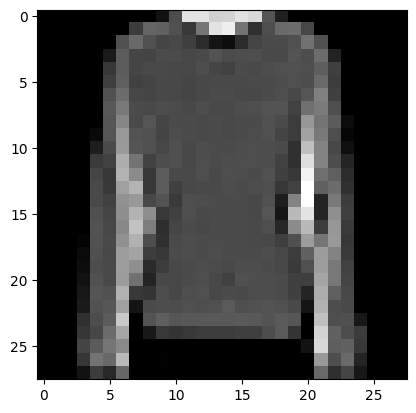

In [ ]:
import matplotlib.pyplot as plt

for image, label in training_set.take(1):
  # Remover las dimensiones con solo una unidad, la ultima en este caso -> (28, 28, 1)
  image = tf.squeeze(image)

  print('Las imágenes en el sub conjunto de entrenamiento tienen:')
  print('dtype:', image.dtype)
  print('shape:', image.shape)
  print('max value',tf.reduce_max(image)) # Encuentra el valor máximo en un tensor
  print('max value',tf.reduce_min(image))  # Encuentra el valor mínimo en un tensor

  print('\nLas etiquetas en el sub conjunto de entrenamiento tienen:')
  print('dtype:', label.dtype)
  print('shape:', label.shape)
  print('Etiqueta:',label)

  plt.imshow(image, cmap ='gray')

### 5.2 Preprocesamiento de datos

Como podemos ver, la primera imagen tiene valores en el rango [0, 255]. Normalizar estos valores hacia el rango [0, 1] es una buena practica debido a que tener imágenes con valores enteros altos puede generar problemas al un modelo y al propagar los gradientes con respecto a los parametros de un modelo. También, es conocido que los datos normalizados permiten optimizar mejor el entrenamiento de un modelo. En consecuencia, crearemos una función corta para normalizar las imágenes y otra para transformarlas cada vez que se requiere cargar imágenes en lotes.

In [ ]:
def normalize(image, label):
    # Convertir la imagen a float32 para usar valores decimales en el tensor
    image = tf.cast(image, tf.float32)
    # Dividir el tensor entre el nivel de intensidad mas alto en la imagen
    image /= 255

    return image, label

def prepare_subset(subset, batch_size):
  # Almacenar el subconjunto de datos de entrenamiento en cache
  batches = training_set.cache()
  # Barajar (intercambiar el orden) el subconjunto. Esta mezcla aleatoria se
  # hara antes de procesar el dataset con el modelo. Podemos definir el comportamiento
  # de esta función (cuan barajados estaran los lotes) definiendo un valor igual o
  # menor al tamaño del subconjunto. Para realizar un barajamiento completo con
  # respecto a todo el subconjunto, solo basta pasar como parametro el tamaño completo
  # del subconjunto. En este caso tomaremos en cuenta a la cuarta parte.
  batches = batches.shuffle(num_training_examples//4)
  # Dividir al subconjunto en lotes y aplicarles la función normalize()
  # prefetch(1) convierte a esta tarea en asincrona, por lo que seguira su ejecución
  # sin paralizar toda la tarea de cargado de datos. De esta manera, las tareas de
  # procesamiento de datos se llevaran a cabo en paralelo
  batches = batches.batch(batch_size).map(normalize).prefetch(1)

  return batches

# Primer hiperparametro. Tamaño de lote.
BATCH_SIZE = 64

training_batches = prepare_subset(training_set, BATCH_SIZE)
testing_batches = prepare_subset(testing_set, BATCH_SIZE)

# Mostrar el contenido de un batch
for image_batch, label_batch in training_batches.take(1):
    print('dtype:', image_batch.dtype)
    print('shape:', image_batch.shape)
    image_batch

    print('Etiquetas:', label_batch)

dtype: <dtype: 'float32'>
shape: (64, 28, 28, 1)
Etiquetas: tf.Tensor(
[3 1 7 1 3 8 2 6 6 7 0 9 2 4 6 2 6 3 1 6 5 8 5 6 9 5 3 9 2 7 0 1 6 5 2 3 7
 5 0 3 4 5 6 1 2 5 8 3 8 3 1 1 9 6 6 4 8 1 9 0 1 5 7 7], shape=(64,), dtype=int64)


Por ahora, se puede entender que el preprocesamiento de un dataset conlleva el uso de varias funciones (también conocidas como transformaciones) que tienen el objetivo de alistar a las imágenes y etiquetas, y que estas se encuentren en el mejor estado posible. Para ver mas estrategías de preprocesamiento se sugiere ver los tutoriales [Mejor rendimiento con la API tf.data](https://www.tensorflow.org/guide/data_performance) y [Transformaciones](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). En los siguientes tutoriales veras métodos mas complejos de carga de datos.

### 5.3 Construir la redes neuronales con Keras

Desde esta sección, usaremos diferentes funciones/capas del API Keras de TensorFlow para construir la red neuronal. Es importante resaltar que se espera que la red reciba una imagen con una prenda de vestir como entrada y prediga a que categoría pertenece la prenda en la imagen. La arquitectura que desarrollaremos es la siguiente:

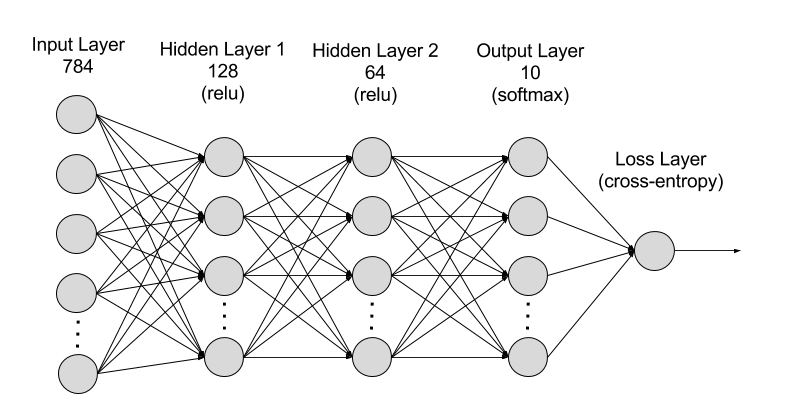

Keras es una API de alto nivel que corre encima de TensorFlow como una interfaz de desarrollo de alto nivel y que tiene como objetivo acelearar la experimentación con modelos. Keras es accesible desde TensorFlow como un submodulo: `tf.keras`. En Keras, los modelos de aprendizaje profundo se construyen conectando bloques configurables llamados capas. El tipo de modelo más común es una pila de capas, también conocida como modelo secuencial o *Sequential Model*. El modelo se llama secuencial porque permite pasar un tensor secuencialmente a través de una serie de capas y generan un resultado. En TF, el modelo secuencial se implementa con `tf.keras.Sequential`.

En la siguiente celda, podrás notar que nuestro modelo secuencial tiene estos tres tipos de capas:

- **Capa de entrada `tf.keras.layers.Flatten`**: Esta capa aplana las imágenes transformando sus dimensiones de 28x28 píxeles a un vector de 784 píxeles (28*28 = 784).

- **Capas ocultas `tf.keras.layers.Dense`:** En este modelo existen dos capas ocultas que tendran la tarea de extraer los patrones desde las imágenes para que luego el modelo pueda reconocer prendas en nuevas imágenes. Estas capas se implementan con capas densamente  conectadas (también conocida como Fully Connected). Para esta capa necesitamos especificar el número de neuronas (o nodos) que queremos usar y la función de activación.

- **Capa oculta `tf.keras.layers.Dense`:** Esta sera una capa densamente conectada con 10 neuronas y una función de activación softmax. Los valores de salida representarán la probabilidad de que la imagen sea de un dígito particular. Para la función softmax, es importante entender que la suma de todos los valores de los 10 nodos sera siempre 1.

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28,1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

# Mostrar resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Inicializar los pesos y bias en el modelo
model.build((None, 28, 28, 1))

# Limpiar los datos en la RAM  que hubiesen sido guardados en entrenamientos anteriores
tf.keras.backend.clear_session()

### 5.4 Entrenamiento de redes neuronales con TensorFlow

Antes de que podamos entrenar nuestro modelo, necesitamos establecer otros hiperparámetros esenciales. Podemos configurar estos usando el método `.compile()`. Los parámetros principales que debemos especificar son:

- **Optimizer:** El algoritmo que usaremos para actualizar los pesos de nuestro modelo durante el entrenamiento. En esta ocasión usaremos el optimizador `ADAM`.
- **Función de pérdida:** la función de pérdida que usaremos durante el entrenamiento para medir la diferencia entre las etiquetas verdaderas de las imágenes en el conjunto de datos y las predicciones hechas por el modelo. En esta lección usaremos la función de pérdida `sparce_categorical_crossentropy`.
- **Métricas:** una lista de métricas que el modelo evaluará durante el entrenamiento. A lo largo de estos laboratorios, mediremos diferentes metricas para evaluar a nuestro modelo. Por ejemplo, `accuracy` calcula con qué frecuencia las predicciones de nuestro modelo coinciden con las etiquetas verdaderas de las imágenes en nuestro dataset. Para obtener una lista completa de las métricas disponibles en `tf.keras`, puedes consultar la documentación de [métricas](https://keras.io/api/metrics/).

Compile permite confirmar mas parametros del proceso de entrenamiento. Puedes revisar estos en la documentación de [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Por ahora, podemos ver que obtiene nuestro modelo si le pasamos un conjunto de imágenes.

In [ ]:
for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\nPerdida (Loss) antes del entrenamiento: {:,.3f}'.format(loss))
print('Precisión antes del entrenamiento: {:.3%}'.format(accuracy))

2/2 [==============================] - 0s 14ms/step - loss: 2.4349 - accuracy: 0.0625

Perdida (Loss) antes del entrenamiento: 2.435
Precisión antes del entrenamiento: 6.250%


Es hora de entrenar la red, en esta ocasión lo haremos con 5 epocas.

In [ ]:
EPOCHS = 5

history = model.fit(training_batches, epochs = EPOCHS)

Epoch 1/5
938/938 [==============================] - 12s 9ms/step - loss: 0.5178 - accuracy: 0.8189
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.3738 - accuracy: 0.8654
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3413 - accuracy: 0.8748
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3143 - accuracy: 0.8846
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2962 - accuracy: 0.8914


In [ ]:
# Mostrar las métricas recolectadas durante cada época
print(history.params)
print(print(history.history['loss']))
print(print(history.history['accuracy']))

{'verbose': 1, 'epochs': 5, 'steps': 938}
[0.5177786350250244, 0.37381285429000854, 0.3413306176662445, 0.31426364183425903, 0.2962193787097931]
None
[0.8188833594322205, 0.8654166460037231, 0.874833345413208, 0.8846166729927063, 0.8913833498954773]
None


### 5.5 Inferencia con el modelo entrenado

Una vez entrenado, podemos comprobar cuan bien aprendio el modelo. Para esto, tomaremos la primera imagen de un lote para visualizar el resultado de predicción del modelo. La función del modelo que nos ayudara con esta tarea sera `.predict()`.

2/2 [==============================] - 0s 4ms/step


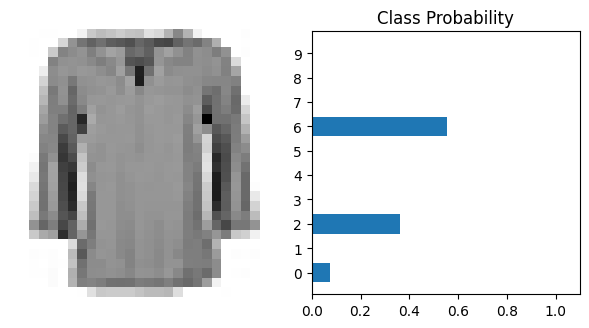

In [ ]:
for image_batch, label_batch in testing_batches.take(1):
  # Predecir resultados con un batch
  ps = model.predict(image_batch)
  # Recuperar la primera imagen
  first_image = image_batch.numpy().squeeze()[0]

# Visualizar la imagen y las probabilidades resultantes de pasar la imagen por el modelo
fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(first_image, cmap = plt.cm.binary)
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

¡No esta mal 🤔!  Si ejecutas la anterior celda veras que el modelo lo hace bien con imágenes de ciertas categorías, pero llega a fallar con otras.

### 5.6 Evaluar el modelo entrenado

La anterior sección generaba resultados al pasar una imagen al modelo, y de esta manera, permitía anzalizar la inferencia de manera visual. Sin embargo, evaluar así un modelo no es preciso, por lo que ahora usaremos la función `.evaluate()` para calcular las métricas que obtiene el modelo con un batch del conjunto de datos de evaluación.

In [ ]:
for image_batch, label_batch in testing_batches.take(1):
    loss, accuracy = model.evaluate(image_batch, label_batch)

print('\n Loss después del entrenamiento: {:,.3f}'.format(loss))
print('Accuracy después del entrenamiento: {:.3%}'.format(accuracy))

2/2 [==============================] - 0s 9ms/step - loss: 0.2734 - accuracy: 0.9375

 Loss después del entrenamiento: 0.273
Accuracy después del entrenamiento: 93.750%


### **Ejercicio 3:** Métricas de Evaluación

Este ultimo modelo obtuvo 95.3% de *accuracy*. Ahora, tendrás que investigar y visualizar las métricas de evaluación LogarithmicLoss, Matriz de Confusión, AUC, Recall, y F1 Score para un lote del subconjunto de evaluación. Las funciones para obtener estas se encuentran disponibles en la librería `sklearn.metrics`.

### **Ejercicio 4:** Clasificación de Imágenes

Para este ejercicio deberas seleccionar un dataset de clasificación de imagenes desde el [catálogo](https://www.tensorflow.org/datasets/catalog/overview#all_datasets) de datasets de TF. Luego, deberas crear una red neuronal para clasificar entre las diferentes categorias del dataset. Finalmente, deberas evaluar el modelo con un lote del subconjunto de evaluación.

## 6. Redes Neuronales Convolucionales (CNNs)

Finalmente, realizaremos la aplicación de las Redes Neuronales Convolucionales para la tarea planteada en la sección anterior. Este tipo de red es uno de los mas destacados en lo que respecta aprendizaje profundo, dado que cuenta con capas convolucionales que permiten extraer mejor los patrones ocultos en imágenes.


### 6.1 Importar librerías. Descargar dataset y mostrar ejemplos.

Los pasos en esta sección son iguales a los planteados en el inicio de la anterior sección.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteACA3GL/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteACA3GL/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Las imágenes en el sub conjunto de entrenamiento tienen:
dtype: <dtype: 'uint8'>
shape: (28, 28)
max value tf.Tensor(255, shape=(), dtype=uint8)
max value tf.Tensor(0, shape=(), dtype=uint8)

Las etiquetas en el sub conjunto de entrenamiento tienen:
dtype: <dtype: 'int64'>
shape: ()
Etiqueta: tf.Tensor(2, shape=(), dtype=int64)


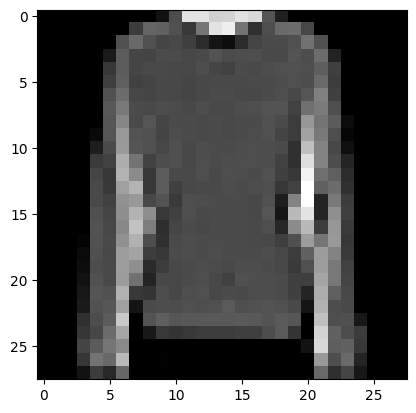

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

import matplotlib.pyplot as plt


training_set, dataset_info_train = tfds.load('fashion_mnist', split = 'train', as_supervised = True, with_info = True)
testing_set, dataset_info_test = tfds.load('fashion_mnist', split = 'test', as_supervised = True, with_info = True)


for image, label in training_set.take(1):
  # Remover las dimensiones con solo una unidad, la ultima en este caso -> (28, 28, 1)
  image = tf.squeeze(image)

  print('Las imágenes en el sub conjunto de entrenamiento tienen:')
  print('dtype:', image.dtype)
  print('shape:', image.shape)
  print('max value',tf.reduce_max(image)) # Encuentra el valor máximo en un tensor
  print('max value',tf.reduce_min(image))  # Encuentra el valor mínimo en un tensor

  print('\nLas etiquetas en el sub conjunto de entrenamiento tienen:')
  print('dtype:', label.dtype)
  print('shape:', label.shape)
  print('Etiqueta:',label)

  plt.imshow(image, cmap ='gray')

### 6.2 Preprocesar dataset

Los pasos en esta sección son iguales a los planteados en las anteriores secciones.

In [ ]:
num_training_examples = dataset_info_train.splits['train'].num_examples

def normalize(image, label):
    # Convertir la imagen a float32 para usar valores decimales en el tensor
    image = tf.cast(image, tf.float32)
    # Dividir el tensor entre el nivel de intensidad mas alto en la imagen
    image /= 255
    return image, label

def prepare_subset(subset, batch_size):
  # Almacenar el subconjunto de datos de entrenamiento en cache
  batches = training_set.cache()
  # Barajar (intercambiar el orden) el subconjunto.
  batches = batches.shuffle(num_training_examples//4)
  # Dividir al subconjunto en lotes y aplicarles la función normalize()
  batches = batches.batch(batch_size).map(normalize).prefetch(1)
  return batches

# Primer hiperparametro. Tamaño de lote.
BATCH_SIZE = 64

training_batches = prepare_subset(training_set, BATCH_SIZE)
testing_batches = prepare_subset(testing_set, BATCH_SIZE)

# Mostrar el contenido de un batch
for image_batch, label_batch in training_batches.take(1):
    print('dtype:', image_batch.dtype)
    print('shape:', image_batch.shape)
    image_batch

    print('Etiquetas:', label_batch)

dtype: <dtype: 'float32'>
shape: (64, 28, 28, 1)
Etiquetas: tf.Tensor(
[4 5 0 9 8 7 7 7 3 1 5 9 8 6 8 0 1 3 7 7 9 0 9 6 4 8 4 2 2 8 6 2 6 4 0 1 3
 3 2 9 2 5 1 0 3 3 1 6 4 5 1 3 5 8 0 1 4 8 6 1 6 0 8 6], shape=(64,), dtype=int64)


### 6.3 Definir la CNN

Como puedes ver, la carga y preprocesamiento del dataset es muy similar, tanto para redes neuronales como para CNNs. Sin embargo, definir una CNN requiere redefinir la arquitectura usada anteriormente. Como ayuda, puedes ver nuestra última arquitectura nuevamente:

In [ ]:
neural_network = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28,1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


En la siguiente celda, podrás notar que nuestro modelo secuencial ahora tiene estos tipos de capas:

- **Capa de entrada `tf.keras.layers.Conv2D`**: Esta vez, vamos a definir una capa convolucional en lugar de la capa Flatten, la cual estaba orientada a convertir las imágenes a vectores. Los parámetros de esta capa son:
  - `64`: El número de convoluciones que desea aplicar: Puramente arbitrario, pero bueno para comenzar con valores iguales a potencias de dos, por ejemplo 32, 64, 128.
  - `(3,3)`: El tamaño de la convolución, en este caso usaremos kernels de 3x3.
  - `activation='relu'`: La función de activación a utilizar. En este caso usaremos relu que es el equivalente a devolver x cuando x> 0, de lo contrario devolver 0.
  - `input_shape=(28, 28, 1)`: las dimensiones de las imágenes de entrada.

- **Capa intermedias `tf.keras.layers.Conv2D` y `tf.keras.layers.MaxPooling2D`**: En el caso de las capas convolucionales intermedias, estan deberán ser definidas a su criterio, tomando en cuenta los parametros mencionados en el punto anterior excepto `input_shape`. Un practica comun en CNNs es aplicar una capa MaxPooling después de aplicar una capa convolucional. Esto debido a que las capas del tipo pooling ayudan a reducir el tamaño de las imágenes y mantener las características mas importantes. Al especificar (2,2) para el MaxPooling, el imagen resultante sera del tamaño de un cuarto del tamaño anterior de la imagen entrante.

- **Clasificador `tf.keras.layers.Flatten` y `tf.keras.layers.Dense`**: Todas las anteriores capas forman parte de un componente denominado extractor de características y su finalidad es extraer características visuales que permitan distinguir rasgos comunes en las imágenes de un dataset. La ultima capa generalmente genera un tensor extenso que debera ser aplanado para servir de entrada a las siguientes capas del modelo. Debido a esto, aplicar Flatten es un procedimiento comun en este punto. A las siguientes capas Dense se las conoce como clasificador y tienen la finalidad de detectar la categoría correspondiente a la imagen. La ultima capa requiere una función de activación softmax para generar una distribución de probabilidades correspondientes a las categorías, donde la mayor probailidad sera asignada como categoría a la imagen.


Finalmente, al llamar a `model.summary()` podrá ver el tamaño y la forma de la red, y notará que después de cada capa MaxPooling, el tamaño de la imagen se tiende a reducirse. Por otra parte, puedes visitar este [link](https://www.tensorflow.org/api_docs/python/tf/keras/layers) si gustas explorar mas sobre las diferentes capas existentes en `tf.keras.layers`.

In [ ]:
cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

### 6.4 Entrenar y evaluar la CNN  

Los pasos en esta sección son similares a los descritos en el punto 5.4.

In [ ]:
# Definir hiperparametros
EPOCHS = 15
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = cnn.fit(training_batches, epochs = EPOCHS)

Epoch 1/15
938/938 [==============================] - 22s 10ms/step - loss: 0.4660 - accuracy: 0.8315
Epoch 2/15
938/938 [==============================] - 4s 5ms/step - loss: 0.3124 - accuracy: 0.8862
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2691 - accuracy: 0.9012
Epoch 4/15
938/938 [==============================] - 4s 5ms/step - loss: 0.2385 - accuracy: 0.9114
Epoch 5/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2117 - accuracy: 0.9209
Epoch 6/15
938/938 [==============================] - 4s 4ms/step - loss: 0.1871 - accuracy: 0.9304
Epoch 7/15
938/938 [==============================] - 4s 5ms/step - loss: 0.1687 - accuracy: 0.9376
Epoch 8/15
938/938 [==============================] - 4s 4ms/step - loss: 0.1493 - accuracy: 0.9454
Epoch 9/15
938/938 [==============================] - 4s 4ms/step - loss: 0.1341 - accuracy: 0.9495
Epoch 10/15
938/938 [==============================] - 5s 5ms/step - loss: 0.1174 - accuracy: 0.95

Parece que nuestro modelo esta alcanzando mejores resultados, sin embargo, requiere de mas épocas para lograr un mejor rendimiento. Ahora, visualizaremos los datos historicos de las perdidas y la precisión durante el entrenamiento.

<Axes: >

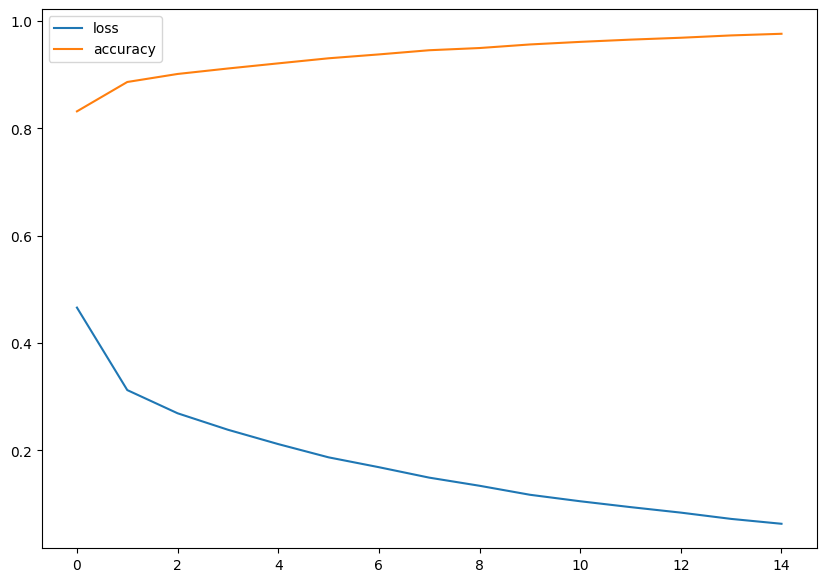

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [ ]:
# Evaluar modelo
loss, test_acc = cnn.evaluate(testing_batches)

print(test_acc)

938/938 [==============================] - 3s 3ms/step - loss: 0.0470 - accuracy: 0.9827
0.982699990272522


En este caso, podemos ver que nuestro *accuracy* final es mayor al que obtuvimos con la red neuronal regular. En consecuencia, es importante enfatizar que una CNN tendrá mayores capacidades para generalizar la tarea de detección, y de esta manera, rendir bien con nuevas instancias.

### **Ejercicio 5:** Despliegue del modelo

En este ejercicio, deberás desarrollar un modelo de predicción de la edad basado en redes neuronales convolucionales. El dataset que deberás usar es [UTKFace](https://susanqq.github.io/UTKFace/).

Posterior a esto, deberás crear un archivo `.py` que reciba una imagen de un rostro (revisar el siguiente [tutorial](https://www.eumus.edu.uy/eme/ensenanza/electivas/python/2020/clase_08a.html) sobre como pasar argumentos a archivos python) de manera local y lo pase al modelo de tensorflow basado en CNNs, para que este imprima la categoría reconocida en la imagen. Se recomienda guardar una imagen del dataset en formato de archivo .jpg.

Para presentar el trabajo debera adjuntar el archivo .py y un video demostrando de manera breve que su modelo CNN esta realizando inferencia.




## 7. Referencias
- [Introducción a los tensores ](https://www.tensorflow.org/guide/tensor)
- [Variables en TensorFlow](https://www.tensorflow.org/guide/variable)
- [How to Create Tensors with Known Values?](https://www.dummies.com/article/technology/information-technology/ai/machine-learning/create-tensors-known-values-253479/)
- [TensorFlow Basics](https://www.tensorflow.org/guide/basics)
- [Examinando el gráfico de TensorFlow](https://www.tensorflow.org/tensorboard/graphs)
- [Consejos para Mejorar el Rendimiento de Modelos](https://www.tensorflow.org/datasets/performances)